<a href="https://colab.research.google.com/github/WittyFrost/trails/blob/master/Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Statistical Machine Learning 2025 - Rupam Singh
# **Exercise 2: Data processing and Features Extraction (Week 2)**

**Problem:** You are provided with a dataset which undergoes various preprocessing steps, including identifying and handling outliers, imputing missing values, standardizing, deduplicating, adding noise, and both downsampling and upsampling. Additionally, the dataset is normalized, and features are extracted for analysis. The goal is to guide you through understanding and performing these preprocessing steps and exploring the visualizations and analyses for the original and transformed datasets.

**Libraries to be Used:**
*   pandas for data manipulation

*   numpy for numerical operations

*   seaborn and matplotlib.pyplot for data visualization

*   scipy.stats for statistical functions

*   sklearn.preprocessing for scaling and imputing

*   sklearn.preprocessing for scaling and imputing

*   sklearn.preprocessing for scaling and imputing

*   sklearn.impute for handling missing values

*   sklearn.utils for resampling

*   pandas.plotting for scatter matrix visualization

**Features to be Extracted:**
*   Central tendency measures: mean, median

*   Dispersion measures: variance, standard deviation, range

*   Distribution measures: skewness, kurtosis

*   Correlation matrix

*   Time series feature: rolling mean

**Steps to be Followed:**

1.   Create Dataset: A dataset is provided.

2.   Identify and Plot Outliers: Use z-score to identify outliers and visualize them with a scatter plot.

3.   Remove Outliers: Remove outliers identified in the previous step.

4.   Impute Missing Values: Introduce missing values and impute them using the mean strategy.

5.   Handle Invalid Values: Replace invalid values with NaN.

6.   Standardize: Standardize the feature using StandardScaler.

7.   Deduplicate: Remove duplicate rows from the dataset.

8.   Add Noise: Add normal noise to the dataset.

9.   Downsample: Create a downsampled dataset with 5 samples.

10.   Upsample: Create an upsampled dataset with 15 samples.

11.   Normalize: Normalize the dataset using MinMaxScaler.

12.   Extract Features: Define a function to extract various statistical features from the dataset.

13.   Extract Features for Different Datasets: Apply the feature extraction function to the original, noisy, downsampled, upsampled, and normalized datasets.

14.   Visualization and Analysis: Visualize and analyze the original dataset using histograms, box plots, violin plots, scatter matrix, and correlation matrix. Repeat similar visualizations and analyses for the noisy, downsampled, upsampled, and normalized datasets.

**Your Task:**

1.   Execute each step and observe the changes in the dataset.

2.   Explore visualizations and analyses for each dataset.

2.   Answer questions related to the impact of preprocessing steps on data distribution, outliers, and statistical measures.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, skew, kurtosis
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from pandas.plotting import scatter_matrix



*   Imports the pandas library and aliases it as pd. Pandas is used for data manipulation and analysis. https://pandas.pydata.org/

*   Imports the numpy library and aliases it as np. Numpy is used for scientific computing and working with arrays. https://numpy.org/

*   Imports the seaborn library and aliases it as sns. Seaborn is a statistical data visualization library built on top of matplotlib. It provides a high-level interface for drawing attractive statistical graphics. https://seaborn.pydata.org/

*   Imports matplotlib's pyplot module and aliases it as plt. Pyplot provides matplotlib's plotting functions for creating visualizations. https://matplotlib.org/

*   Imports zscore, skew and kurtosis functions from scipy's stats module. These are used for statistical tests and calculations. https://docs.scipy.org/doc/scipy/reference/stats.html

*   Imports the MinMaxScaler and StandardScaler classes from scikit-learn's preprocessing module. These are used for scaling/normalizing data. https://scikit-learn.org/stable/modules/preprocessing.html

*   Imports the SimpleImputer class from scikit-learn's impute module. This provides basic strategies for imputing missing values in data. https://scikit-learn.org/stable/modules/impute.html

*   Imports the resample function from scikit-learn's utils module. This is used for resampling datasets to balance classes. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.utils

*   Imports the scatter_matrix function for pair-wise scatter plots of data features/columns. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html

In [ ]:
# Step 1: Create dataset
data = {
    'a': [3, 5, 8, 10, 12, 6, 4, 7, 9, 11],
    'b': [7, 9, 12, 15, 18, 10, 8, 11, 14, 17],
    'c': [10, 15, 20, 25, 30, 18, 12, 22, 28, 35]
}
df = pd.DataFrame(data)

*   Creates a dictionary data with three columns of numeric data

*   Imports the pandas library and aliases it as pd

*   List itemUses the pd.DataFrame() constructor to convert the dictionary into a Pandas DataFrame

The resulting df DataFrame will have three columns named 'a', 'b', and 'c' containing the list data from the dictionary.

# Your task is to use the dataset provided to you here instead of the sample dataset. You can either use the full dataset or a part of the dataset.




In [ ]:
# Step 2: Identify and plot outliers
z = np.abs(zscore(df))
outliers = df[(z > 3).any(axis=1)]
print("Outliers:")
print(outliers)
if not outliers.empty:
    fig, ax = plt.subplots()
    outliers.plot.scatter(x='a', y='b', ax=ax)
    plt.title("Outliers")
    plt.show()

Outliers:
Empty DataFrame
Columns: [a, b, c]
Index: []




*   **np.abs(zscore(df)):** Compute the absolute z-scores for each value in df. The zscore normalizes the data to have a mean of 0 and standard deviation of 1. Taking the absolute value makes all scores positive.

*   **outliers = df[(z > 3).any(axis=1)]:** Filter df to only rows where any column has a z-score > 3. These are outlier rows since they are more than 3 standard deviations from the mean.

*   **if not outliers.empty:** Check if there are any outlier rows

*   **outliers.plot.scatter(x='a', y='b', ax=ax):** Create a scatter plot of columns 'a' and 'b' from the outliers DataFrame

In [ ]:
# Step 3: Remove outliers
df = df[(z <= 3).all(axis=1)]


*   **df[(z <= 3).all(axis=1)]:** Filter df to only keep rows where all columns have a z-score less than or equal to 3.

**Breakdown:**


1.   z contains the z-scores that were previously calculated for each value in df

2.   (z <= 3) performs a boolean comparison to find z-scores <= 3

3.   all(axis=1) checks if all values along each row are <= 3

4.   This returns a boolean Series marking non-outlier rows

5.   This boolean Series is used to index and filter df to remove outlier rows

So after this line, df will contain only the rows where no column had a z-score > 3, effectively removing all previously identified outliers. By removing outliers, the data distribution becomes less skewed and better represents the core relationship between variables. This results in a dataset better suited for analysis and modeling.

# You task is to see how different z scores can impact the data distribution on the dataset you selected.

In [ ]:
# Step 4: Impute missing values
missing_values = np.nan
df['d'] = df['a']
df.loc[3, 'd'] = missing_values
imputer = SimpleImputer(strategy='mean')
df['d'] = imputer.fit_transform(df[['d']])


*   missing_values = np.nan : Defines NaN as the value to represent missing data

*   df['d'] = df['a']: Makes a copy of column 'a' into new column 'd'

*   df.loc[3, 'd'] = missing_values: Sets the value in the 3rd row of column 'd' to be NaN

*   imputer = SimpleImputer(strategy='mean'): Creates a SimpleImputer to fill missing values with the mean

*   df['d'] = imputer.fit_transform(df[['d']]): Applies the imputer to column 'd'. Fits the imputer on that column and transforms it to fill missing values with the mean.

So in summary, it adds a new column, sets a value to be missing, creates an imputation transformer using mean strategy, and applies that transformer to fill in the missing value with the mean.

In [ ]:
# Step 5: Handle invalid values
invalid_values = [-999, -1]
df.replace(invalid_values, np.nan, inplace=True)



*   **Handle Invalid Values:** Replace invalid values -999 and -1 with NaN.

*   df.replace() is used to take these invalid values and replace them with NaN

*   Replacing invalid data with NaN ensures these bad values will be excluded from analysis rather than skew results



# You task is identify which datapoints are invalid in your dataset and set the values accordingly. Give a reason for the value to be invalid.

In [ ]:
# Step 6: Standardize
scaler = StandardScaler()
df['standardized'] = scaler.fit_transform(df[['a']])


*   **Standardize:** Standardize column 'a' to have 0 mean and 1 standard deviation using StandardScaler.

*   This places the values on a common scale to allow for comparison

*   Useful for many ML models that assume normal distribution

In [ ]:
# Step 7: Deduplicate
df = df.drop_duplicates()

*   **Deduplicate:** Drop duplicate rows from df

*   Duplicate rows provide redundant information

*   Dropping duplicates avoids overweighting repeated data entries

*   Creates a clean dataset of unique samples

In [ ]:
# Step 8: Add noise
noise = np.random.normal(0, 2, size=df.shape)
df_noise = df + noise



*   **Add Noise:** Add normally distributed random noise to simulate new data.

*   Provides regularization to help prevent overfitting

*   Models trained on noisy data are more robust

# Your task is to identify different types of noises that can be added to a dataset to help prevent overfitting. Compare the results obtained by introducing one of the identified noises with the outcomes of normally distributed random noise.

In [ ]:
# Step 9: Downsample
df_down = resample(df, n_samples=5)



*   **Downsample:** Downsample df to only 5 random rows using resample.

*   Small datasets help prevent overfitting and forces models to learn from minimal data

# Your task is to apply two different downsampling values to the dataset you have and compare the results.

In [ ]:
# Step 10: Upsample
df_up = resample(df, n_samples=15)



*   **Upsample:** Upsample df to 15 rows to simulate more data.

*   Provides more examples for training and models can learn nuances from larger populations

# Your task is to apply two different Upsample values to the dataset you have and compare the results.


In [ ]:
# Step 11: Normalize
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


*   Normalize: Normalize all columns to a range of [0, 1] using MinMaxScaler

*   Puts all features on same relative scale and allows for comparisons across  data types

In [ ]:
# Step 12: Extract features
def extract_features(df):
    features = {}
    # Central tendency
    features['mean'] = df.mean()
    features['median'] = df.median()
    # Dispersion
    features['variance'] = df.var()
    features['std_dev'] = df.std()
    features['range'] = df.max() - df.min()
    # Distribution
    features['skewness'] = df.apply(lambda x: skew(x))
    features['kurtosis'] = df.apply(lambda x: kurtosis(x))
    # Correlation matrix
    features['corr_mat'] = df.corr()
    # Time series
    features['rolling_mean'] = df['a'].rolling(window=3, min_periods=1).mean()
    return features

This function defines a process for feature extraction from the DataFrame df:

**mean_values = df.mean()**
- Calculates mean (average) across all columns in dataframe and stores it in mean_values variable. Gives central tendency measurement.

[pandas.DataFrame.mean](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)

**median_values = df.median()**
- Calculates median across all columns and stores in median_values. Gives central tendency measurement more robust to outliers.

[pandas.DataFrame.median](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html)

**variance_values = df.var()**
- Calculates variance across dataframe columns using .var() method. Gives estimate of how spread out data is from mean, higher variance indicates more dispersed data.

[pandas.DataFrame.var](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html)

**std_deviation_values = df.std()**
- Measures how dispersed the data is from the mean value. Higher standard deviation means the data is more spread out.
It is calculated by taking the square root of the variance.
In pandas, the .std() DataFrame method calculates the standard deviation for each column.

[pandas.DataFrame.std](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html)

**range_values = df.max() - df.min()**

- This line finds the range of each column in the dataframe. Specifically:
df.max(): Returns a pandas Series with the maximum value in each column

[pandas.DataFrame.max](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html)

df.min(): Returns a pandas Series with the minimum value in each column

[pandas.DataFrame.min](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html)

By subtracting the min Series from the max Series (max - min), we get a pandas Series containing the range for each column.

**skewness_values = df.apply(lambda x: skew(x))**
- Calculates skewness across columns using .apply() + scipy skew function. Skewness measures asymmetry of distribution. Positive skewness means right tail goes further from mean. Negative means left tail goes further.


**kurtosis_values = df.apply(lambda x: kurtosis(x))**
- Measures how heavy-tailed or light-tailed a distribution is. A higher kurtosis means more of the variance is due to infrequent extreme deviations (heavy tails). Lower kurtosis means more of the variance is due to frequent modestly sized deviations (light tails). In pandas, we use .apply() to run the scipy kurtosis() function across each column.

*The lambda allows you to:*

- Quickly define a reusable one-line function
- Avoid having to explicitly declare a named function
- Pass that function into apply() to broadcast over the DataFrame

**corr_mat: Correlation matrix between columns**

- Finds correlation between column 'a' and 'b' in dataframe using .corr(). Gives number between -1 to 1 indicating negative to positive correlation strength between two variables.

[pandas.DataFrame.corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

**rolling_mean: Rolling 3-period mean of column 'a'**

- The rolling mean captures the local, short-term trends in a time series by calculating averages over a moving window (set to a size of 3 in this case).

- The code df['a'].rolling(window=3, min_periods=1).mean() specifically calculates the rolling mean on column 'a' from the DataFrame df:

- df['a']: Selects just the 'a' column data from df to calculate rolling mean
- rolling(window=3): Defines a rolling window of size 3 periods/rows
- min_periods=1: Allows the statistic to be calculated even for initial < 3 rows
- mean(): Applies mean calculation to the rolling window
- The output is a Series containing the rolling 3-period mean value for each entry, aligned to the original df index.

In [ ]:
# Step 13: Extract features for different datasets
features_orig = extract_features(df)
features_noise = extract_features(df_noise)
features_down = extract_features(df_down)
df_up = resample(df, n_samples=15)
features_up = extract_features(df_up)
features_norm = extract_features(df_norm)

- **features_orig:** Extracts features from original df

- **features_noise:** Extracts features from noisy df_noise

- **features_down:** Extracts features from downsampled df_down

- **features_up:** Extracts features from upsampled df_up

- **features_norm:** Extracts features from normalized df_norm


Original Dataset:
    a   b   c          d  standardized
0   3   7  10   3.000000     -1.566699
1   5   9  15   5.000000     -0.870388
2   8  12  20   8.000000      0.174078
3  10  15  25   7.222222      0.870388
4  12  18  30  12.000000      1.566699


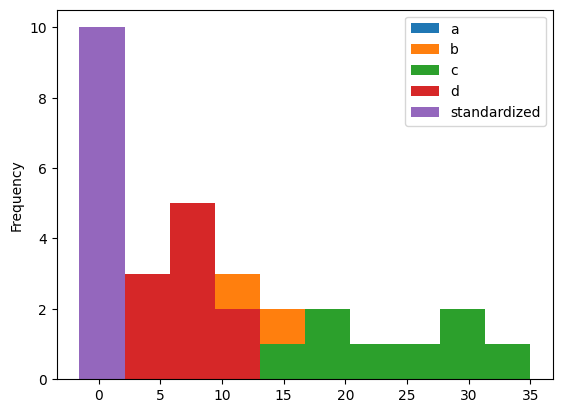

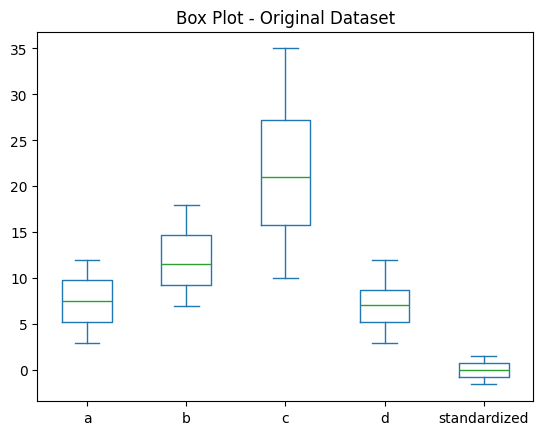

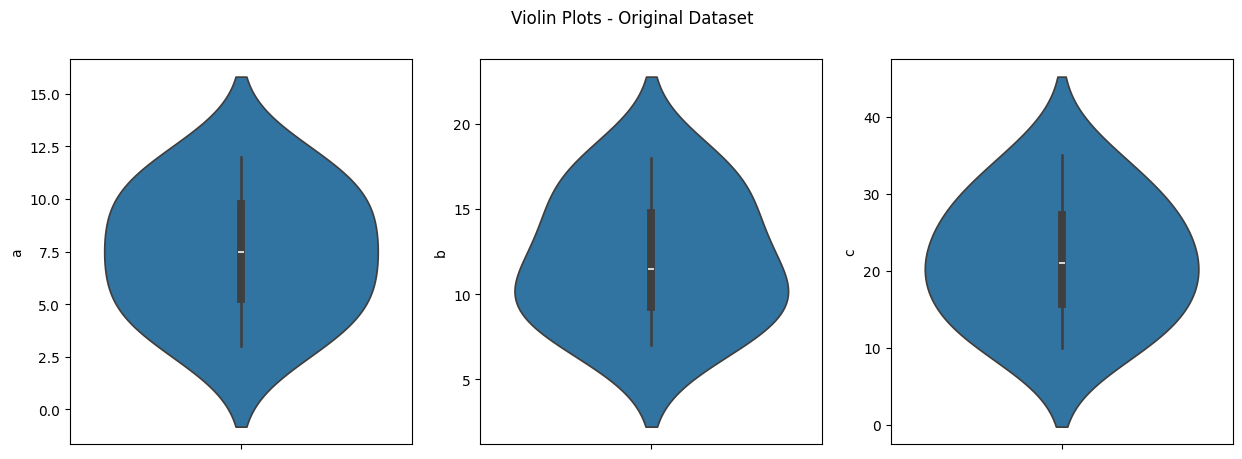

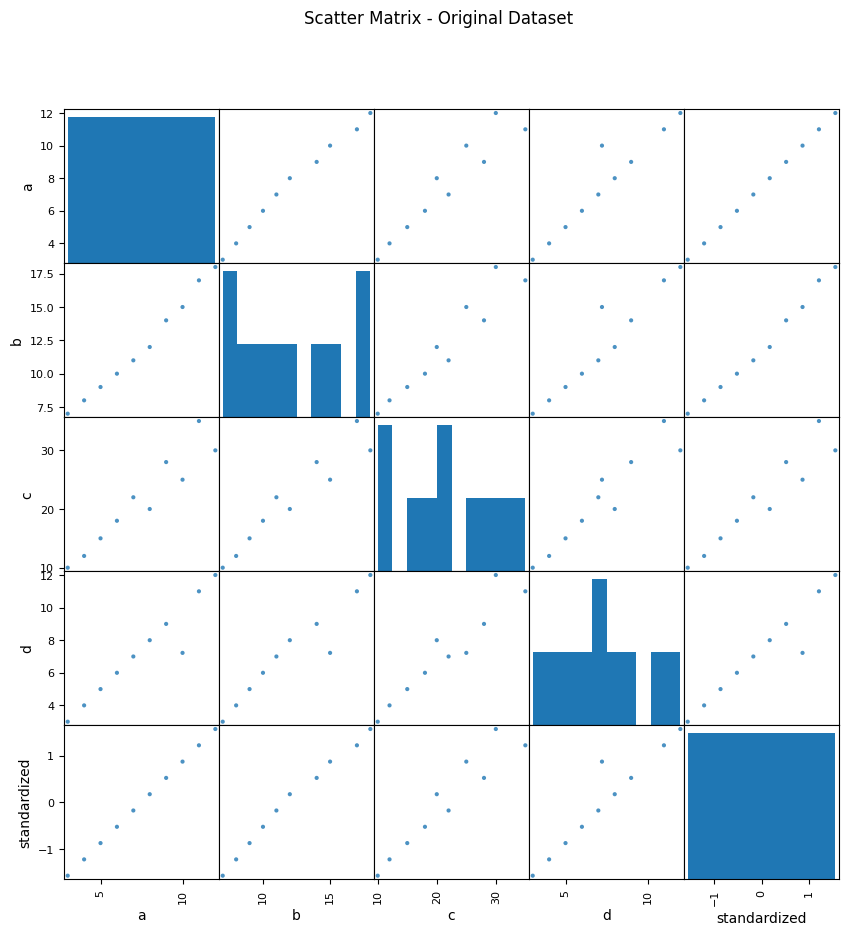

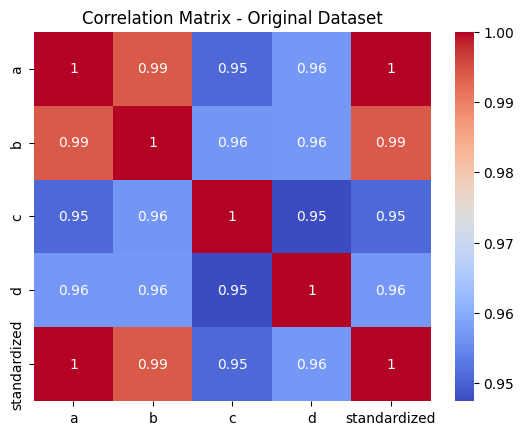

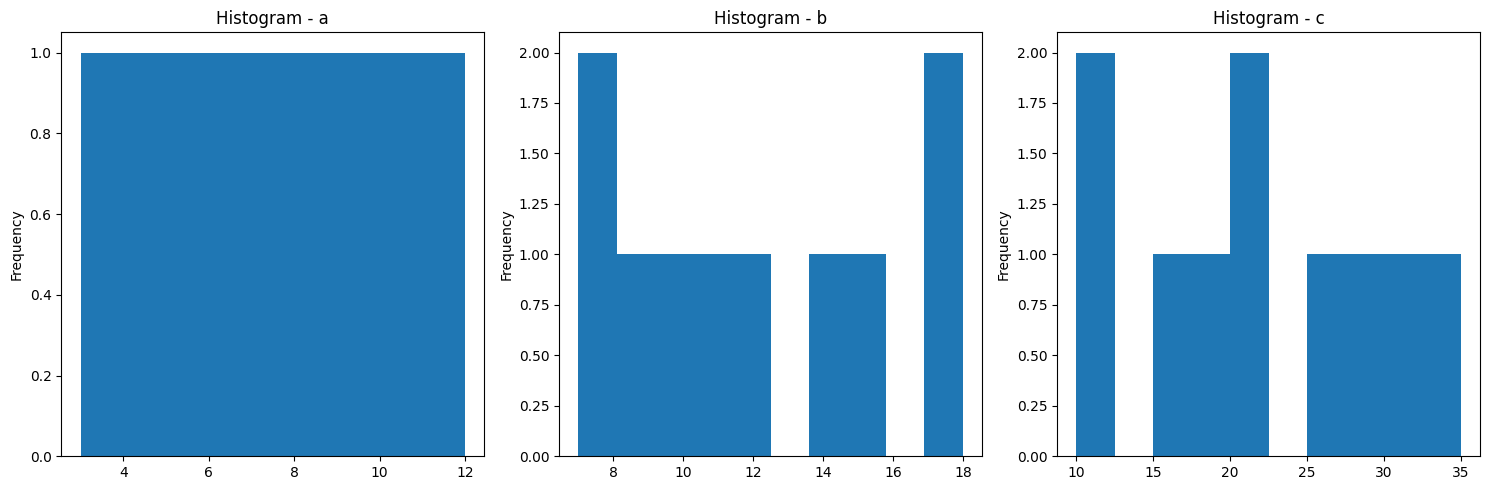

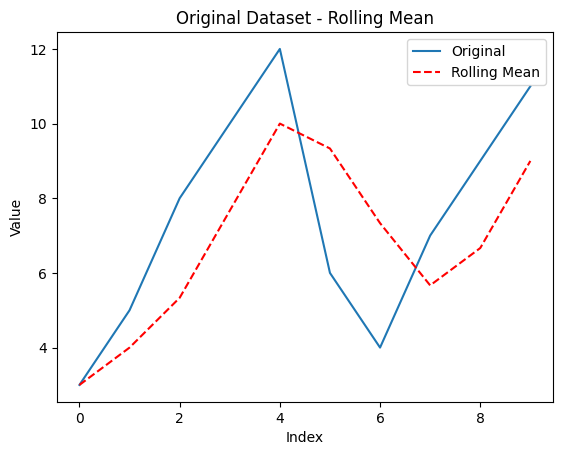

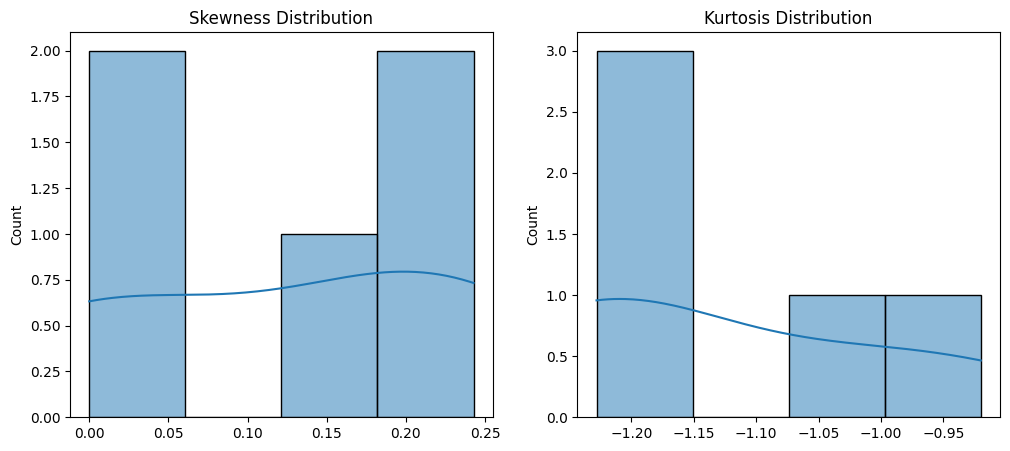


Noisy Dataset:
           a          b          c          d  standardized
0   4.273584   9.133292  11.808786   6.961573      0.421413
1   4.436733   6.155722  13.450239   4.173285     -3.769943
2  11.615995  11.768067  19.581511   5.628071     -0.483303
3  11.585391  14.722174  26.605580   6.884312     -0.252579
4  11.011399  18.786010  32.067331  11.714163      2.776650


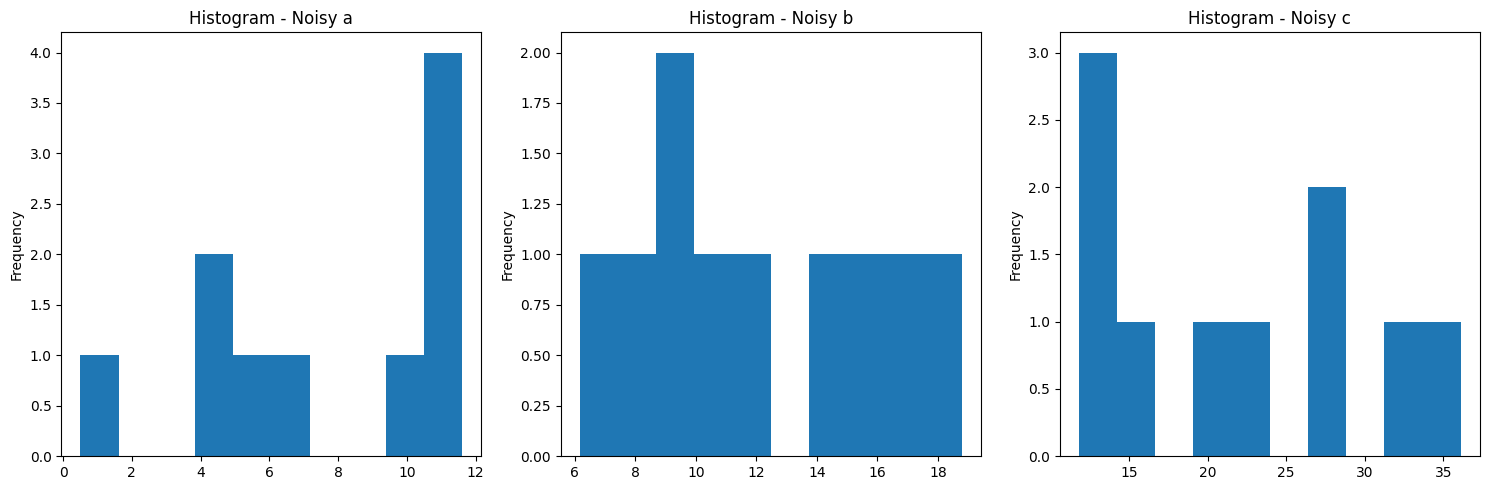


Downsampled Dataset:
    a   b   c     d  standardized
2   8  12  20   8.0      0.174078
5   6  10  18   6.0     -0.522233
5   6  10  18   6.0     -0.522233
4  12  18  30  12.0      1.566699
6   4   8  12   4.0     -1.218544


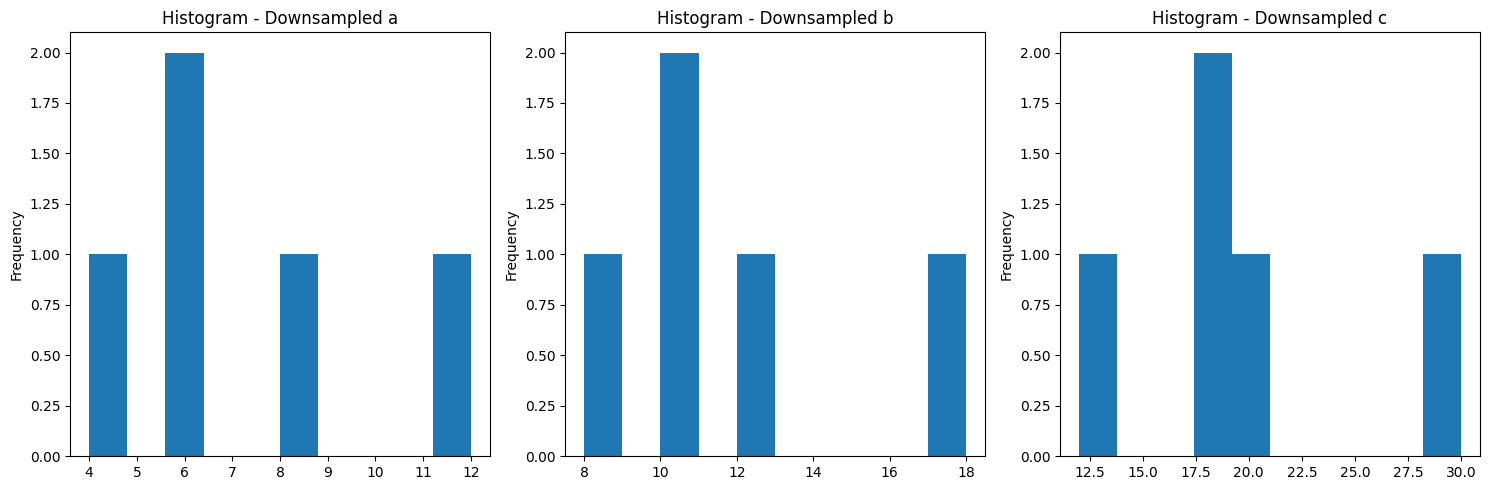


Upsampled Dataset:
   a   b   c    d  standardized
8  9  14  28  9.0      0.522233
7  7  11  22  7.0     -0.174078
0  3   7  10  3.0     -1.566699
8  9  14  28  9.0      0.522233
8  9  14  28  9.0      0.522233


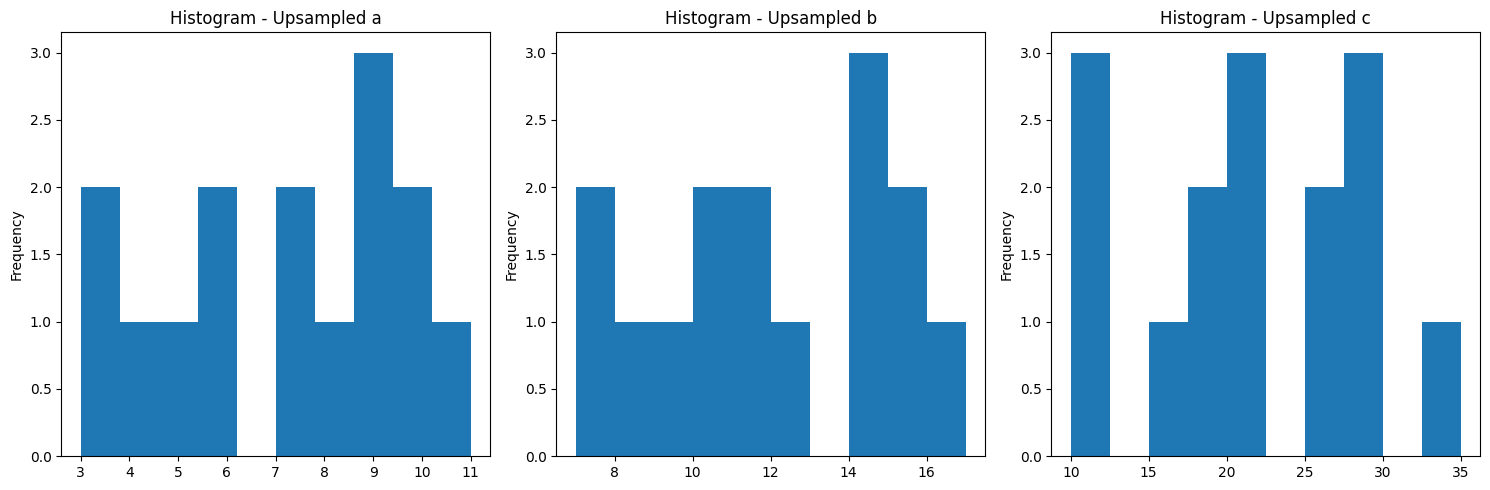


Normalized Dataset:
          a         b    c         d  standardized
0  0.000000  0.000000  0.0  0.000000      0.000000
1  0.222222  0.181818  0.2  0.222222      0.222222
2  0.555556  0.454545  0.4  0.555556      0.555556
3  0.777778  0.727273  0.6  0.469136      0.777778
4  1.000000  1.000000  0.8  1.000000      1.000000


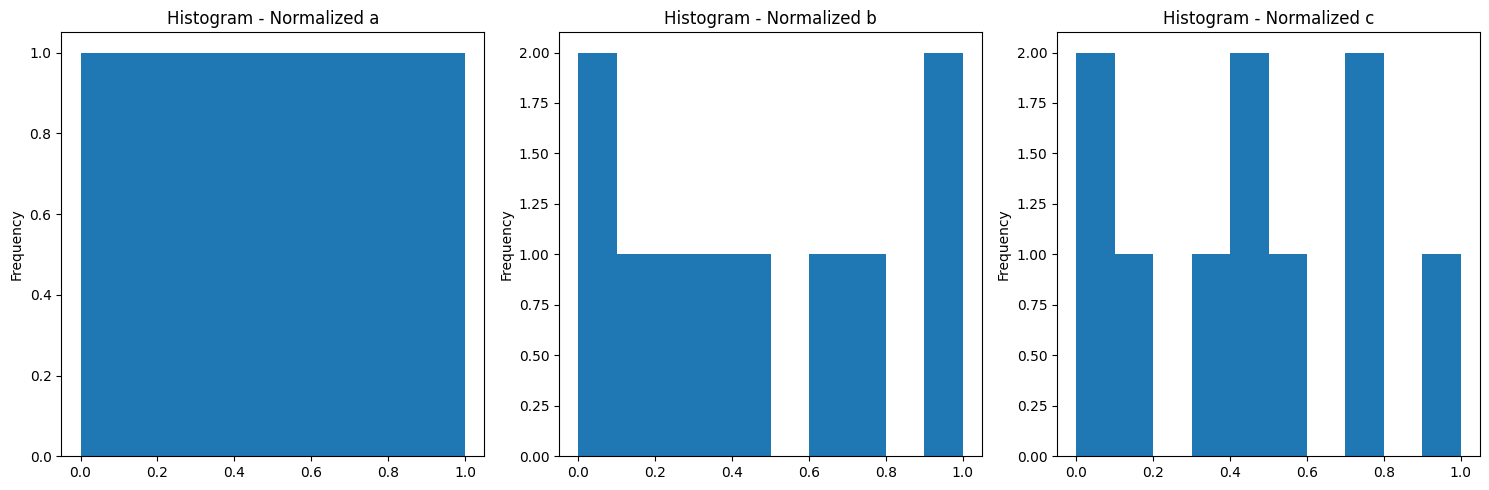

In [ ]:
# Step 14: Visualization and analysis for the original dataset
print("\nOriginal Dataset:")
print(df.head())

# Histogram
fig, ax = plt.subplots()
df.plot.hist(ax=ax)
plt.show()

# Box Plot
fig, ax = plt.subplots()
df.plot.box(ax=ax)
plt.title("Box Plot - Original Dataset")
plt.show()

# Violin Plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.violinplot(y=df['a'], ax=axes[0])
sns.violinplot(y=df['b'], ax=axes[1])
sns.violinplot(y=df['c'], ax=axes[2])
plt.suptitle("Violin Plots - Original Dataset")
plt.show()

# Scatter Matrix
scatter_matrix(df, alpha=0.8, figsize=(10, 10), diagonal='hist')
plt.suptitle("Scatter Matrix - Original Dataset")
plt.show()

# Correlation Matrix
sns.heatmap(features_orig['corr_mat'], annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Original Dataset")
plt.show()

# Histograms for each column
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
df['a'].plot.hist(ax=axes[0], title='Histogram - a')
df['b'].plot.hist(ax=axes[1], title='Histogram - b')
df['c'].plot.hist(ax=axes[2], title='Histogram - c')
plt.tight_layout()
plt.show()

# Rolling Mean for 'a'
fig, ax = plt.subplots()
df['a'].plot(label='Original')
features_orig['rolling_mean'].plot(label='Rolling Mean', linestyle='--', color='red')
plt.legend()
plt.title("Original Dataset - Rolling Mean")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

# Skewness and Kurtosis Distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(features_orig['skewness'], kde=True, ax=axes[0])
axes[0].set_title("Skewness Distribution")

sns.histplot(features_orig['kurtosis'], kde=True, ax=axes[1])
axes[1].set_title("Kurtosis Distribution")

plt.show()

# Similar visualizations and analysis for other datasets (df_noise, df_down, df_up, df_norm)

# Noisy Dataset
print("\nNoisy Dataset:")
print(df_noise.head())

# Histograms for each column in the noisy dataset
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
df_noise['a'].plot.hist(ax=axes[0], title='Histogram - Noisy a')
df_noise['b'].plot.hist(ax=axes[1], title='Histogram - Noisy b')
df_noise['c'].plot.hist(ax=axes[2], title='Histogram - Noisy c')
plt.tight_layout()
plt.show()

# Downsampled Dataset
print("\nDownsampled Dataset:")
print(df_down.head())

# Histograms for each column in the downsampled dataset
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
df_down['a'].plot.hist(ax=axes[0], title='Histogram - Downsampled a')
df_down['b'].plot.hist(ax=axes[1], title='Histogram - Downsampled b')
df_down['c'].plot.hist(ax=axes[2], title='Histogram - Downsampled c')
plt.tight_layout()
plt.show()

# Upsampled Dataset
print("\nUpsampled Dataset:")
print(df_up.head())

# Histograms for each column in the upsampled dataset
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
df_up['a'].plot.hist(ax=axes[0], title='Histogram - Upsampled a')
df_up['b'].plot.hist(ax=axes[1], title='Histogram - Upsampled b')
df_up['c'].plot.hist(ax=axes[2], title='Histogram - Upsampled c')
plt.tight_layout()
plt.show()

# Normalized Dataset
print("\nNormalized Dataset:")
print(df_norm.head())

# Histograms for each column in the normalized dataset
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
df_norm['a'].plot.hist(ax=axes[0], title='Histogram - Normalized a')
df_norm['b'].plot.hist(ax=axes[1], title='Histogram - Normalized b')
df_norm['c'].plot.hist(ax=axes[2], title='Histogram - Normalized c')
plt.tight_layout()
plt.show()

The goal of this step is exploratory data analysis and visualization for the original and transformed datasets.

**For the original dataset, it:**

- Prints rows

- Plots histograms, boxplots, violin plots, scatter matrix

- Computes correlation matrix, rolling means

- Plots skew/kurtosis distributions

**For the noisy, downsampled, upsampled and normalized datasets, it:**

- Prints rows

- Plots column histograms

This allows visual inspection of distributions and patterns within each dataset version.

**Key plots and metrics surface insights into:**

- Central tendency

- Dispersion

- Correlations

- Time dynamics

- Impact of transformations